
# [2] NLP features from language

## 1) Preprocessing words

- Steaming 
- Lematization 
  

## 2) Features for documents

We can encode documents in lots of ways. Let us explore several strategies for converting raw strings to feature vectors representing whole documents.

### 2.1) From docs to feature vectors: Make your own countvectorizer
   - I)   No cleaning, no lemmatization
   - II)  Yes cleaning, no lemmatization
   - III) Yes cleaning, yes lemmatization

### 2.2)  Ngram features with Sklearn vectorizer
Use the standard vectorizer from sklaern

   

### 2.3) Feature selection

We can have too many unreliable words (and/for combinations of words). Prunning some of this features might help us to generalize better. 
 
### 2.4) Crossvalidation (Exercise)

We Crosvalidation with a pipeline to explore the different choices you make in the whole program. This can take some time. Use Random Crossvalidation to more efficiently explore the space if your hardware requirements are limited for the problem at hand.


   
### 2.5) Investigate hashing (Exercise)

Use `feature_extraction.FeatureHasher` to generate your vectors. What performance do you get?

  

## 2.1) Preprocessing words

### 2.1.1) Steaming

Steamming consist on removing the suffixes or prefixes used in word. The returned string from a lemmatizer might not be a valid word from the language.

`Stem(saw) = saw`

- Potter algorithm (1980), Lovins stemmer, Husk Stemmer (1990) are relevant algorithms to do steamming.


We can use steamming adn lemmatization to reduce to a similar meaning different forms of similar words

- Example:
   
    - `are`, `is` => `be`
    - `man`, `man`, `man'`
    
Using this process we can trasnform `Dogs are Man's best friend` to `Dog be Man best friend`. 



In [1]:
import sys
import string
import nltk
import numpy as np

import sklearn
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.feature_selection import chi2

In [2]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter    = PorterStemmer()
lancaster = LancasterStemmer()
# nltk.download()

In [3]:
words = ["dogs","destabilize","misunderstanding","railroad","moonlight",
         "football","pass","passing","friendship", "friends", "friendships",
         "passed","trouble","troubling","care", "believes"]
preprocess = [porter, lancaster]

len_bin = 20
col_formater = "{0:len_bin}{1:len_bin}{2:len_bin}".replace("len_bin",str(len_bin))
print(col_formater.format("Word", porter.__class__.__name__, lancaster.__class__.__name__))
print("")
for w in words:
    print( col_formater.format(w, porter.stem(w), lancaster.stem(w)))

Word                PorterStemmer       LancasterStemmer    

dogs                dog                 dog                 
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             
pass                pass                pass                
passing             pass                pass                
friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
passed              pass                pass                
trouble             troubl              troubl              
troubling           troubl              troubl              
care                care                car                 
believes            bel

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize

def stem(sentence):
    token_words = word_tokenize(sentence)
    sentence_stemmed = []
    for word in token_words:
        sentence_stemmed.append(porter.stem(word))
        sentence_stemmed.append(" ")
    return "".join(sentence_stemmed)


In [5]:
s = "J.K. Rowling wrote Harry Potter. She never expected the book to be famous."
stem(s)

'j.k. rowl wrote harri potter . she never expect the book to be famou . '

In [6]:
sent_tokenize(s)

['J.K. Rowling wrote Harry Potter.',
 'She never expected the book to be famous.']

In [7]:
# Be carefull separating phrases
s.split(".")

['J',
 'K',
 ' Rowling wrote Harry Potter',
 ' She never expected the book to be famous',
 '']

In [8]:
word_tokenize(s)

['J.K.',
 'Rowling',
 'wrote',
 'Harry',
 'Potter',
 '.',
 'She',
 'never',
 'expected',
 'the',
 'book',
 'to',
 'be',
 'famous',
 '.']

### 2.1.2) Lemmatization


Lemmatization consist on properly use of a vocabulary and morphological analysis of words, aiming to remove inflectional endings only with the goal of returning any word to a set of base (or dictionary form) words.


`Lemmatize(saw) = see`


We will use a lemmatizer from WordNet (https://wordnet.princeton.edu) avaliable from nltk.


In [9]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [10]:
sentence = "I was running and eating. This was a terrible idea."
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)


In [11]:
sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word)))

Word                Lemma               
I                   I                   
was                 wa                  
running             running             
and                 and                 
eating              eating              
This                This                
was                 wa                  
a                   a                   
terrible            terrible            
idea                idea                


Notice that the words did no change!

This is because there was no context. If we give a part of speech type then the lemmatizer will do what we would expect.

In [12]:
sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos="v")))

Word                Lemma               
I                   I                   
was                 be                  
running             run                 
and                 and                 
eating              eat                 
This                This                
was                 be                  
a                   a                   
terrible            terrible            
idea                idea                


In [13]:
words = ["dogs","destabilize","misunderstanding","railroad","moonlight",
         "football","pass","passing","friendship", "friends", "friendships",
         "passed","trouble","troubling","care", "believes"]
preprocess = [porter, lancaster, wordnet_lemmatizer]

len_bin = 20
col_formater = "{0:len_bin}{1:len_bin}{2:len_bin}{3:len_bin}".replace("len_bin",str(len_bin))
print(col_formater.format("Word", porter.__class__.__name__, lancaster.__class__.__name__, wordnet_lemmatizer.__class__.__name__))
print("")
for w in words:
    print( col_formater.format(w, porter.stem(w), lancaster.stem(w), wordnet_lemmatizer.lemmatize(w)))

Word                PorterStemmer       LancasterStemmer    WordNetLemmatizer   

dogs                dog                 dog                 dog                 
destabilize         destabil            dest                destabilize         
misunderstanding    misunderstand       misunderstand       misunderstanding    
railroad            railroad            railroad            railroad            
moonlight           moonlight           moonlight           moonlight           
football            footbal             footbal             football            
pass                pass                pass                pas                 
passing             pass                pass                passing             
friendship          friendship          friend              friendship          
friends             friend              friend              friend              
friendships         friendship          friend              friendship          
passed              pass   

## 2) Features for documents


### 2.1) From docs to feature vectors: Make your own countvectorizer


Let us build a simple document classifier featurizing each document by word counts


In [14]:
import sklearn.linear_model
import sklearn.model_selection
import sklearn.pipeline
import sklearn.feature_extraction
import sklearn.datasets

from sklearn.feature_extraction.text import CountVectorizer

In [15]:
X = sklearn.datasets.fetch_20newsgroups()

X_train = sklearn.datasets.fetch_20newsgroups(subset="train").data
y_train = sklearn.datasets.fetch_20newsgroups(subset="train").target
X_test  = sklearn.datasets.fetch_20newsgroups(subset="test").data
y_test  = sklearn.datasets.fetch_20newsgroups(subset="test").target


In [16]:
X.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [17]:
print(X["data"][0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







#### Customising Vectoriser classes

- **preprocessor**: a callable that takes an entire document as input (as a single string), and returns a possibly transformed version of the document, still as an entire string. This can be used to remove HTML tags, lowercase the entire document, etc.


- **tokenizer**: a callable that takes the output from the preprocessor and splits it into tokens, then returns a list of these.


- **analyzer**: a callable that replaces the preprocessor and tokenizer. The default analyzers all call the preprocessor and tokenizer, but custom analyzers will skip this. N-gram extraction and stop word filtering take place at the analyzer level, so a custom analyzer may have to reproduce these steps.

##### Example of how to encode sparse matrix fast


Notice that in order to build our data as a matrix we need to use sparse matrices due to the high dimensionality (number of words/features) of the vocabulary.

Here there is a little example to illustrate how we can build a csr_matrix (compressed sparse row matrix) fast.

In [249]:
X = np.array([[1,0,2],[2,1,0],[0,1,3]])
X

array([[1, 0, 2],
       [2, 1, 0],
       [0, 1, 3]])

In [248]:
data = [1,2,2,1,1,3]
row = [0,0,1,1,2,2]
col = [0,2,0,1,1,2]
scipy.sparse.csr_matrix( (data,(row,col)), shape=(3,3) ).todense()

matrix([[1, 0, 2],
        [2, 1, 0],
        [0, 1, 3]], dtype=int64)

#### Exercise: Build a Simple countvectorizer

Complete methods `fit` and `transform`


In [321]:
import scipy
import scipy.sparse as sp
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from collections import defaultdict
import re
stemmer =  SnowballStemmer(language='english')



class SimpleCountVectorizer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    
    def __init__(self,
                 min_word_counts=1,
                 doc_cleaner_pattern=r"[^a-zA-Z]",
                 token_pattern=r"(?u)\b\w\w+\b",
                 dtype=np.float32,
                 doc_cleaner_func=None,
                 tokenizer_func=None,
                 word_transformer_func=None):
        
        self._retype = type(re.compile('hello, world'))

        self.min_word_counts     = min_word_counts
        self.doc_cleaner_pattern = doc_cleaner_pattern
        self.token_pattern       = token_pattern
        self.dtype               = dtype
        
        self.doc_cleaner_func      = doc_cleaner_func
        self.tokenizer_func        = tokenizer_func
        self.word_transformer_func = word_transformer_func

        self.vocabulary = set()
        self.word_to_ind = {}


    def build_doc_cleaner(self, lower=True):
        """
        Returns a function that cleans undesirable substrings in a string.
        It also lowers the input string if lower=True
        """
        if self.doc_cleaner_func:
            return self.doc_cleaner_func
        else:
            if isinstance(self.doc_cleaner_pattern, self._retype):
                #clean_doc_pattern = self.doc_cleaner_pattern.sub(" ", doc)
                clean_doc_pattern = re.compile(self.doc_cleaner_pattern)
            else:
                clean_doc_pattern = re.compile(self.doc_cleaner_pattern)

            if lower:
                 return lambda doc: clean_doc_pattern.sub(" ", doc).lower()
            else:
                 return lambda doc: clean_doc_pattern.sub(" ", doc)

    def build_tokenizer(self):
        """Returns a function that splits a string into a sequence of tokens"""
        if self.tokenizer_func:
            return self.tokenizer_func
        
        else:
            token_pattern = re.compile(self.token_pattern)
            return lambda doc: token_pattern.findall(doc)

    def build_word_transformer(self):
        """Returns a stemmer or lemmaitzer if object has any"""
        
        if self.word_transformer_func:
            return self.word_transformer_func
        else:
            return lambda word: word
        
    def tokenize(self, doc):
        doc_cleaner      = self.build_doc_cleaner()
        doc_tokenizer    = self.build_tokenizer()
        doc     = doc_cleaner(doc)
        words = doc_tokenizer(doc)
            
        return words
        
    def fit(self, X):

        assert self.vocabulary == set(), "self.vocabulary is not empty it has {} words".format(len(self.vocabulary))
        assert isinstance(X,list), "X is expected to be a list of documents"
        
        i = 0
        word_to_ind = {}
        doc_cleaner      = self.build_doc_cleaner()
        doc_tokenizer    = self.build_tokenizer()
        word_transformer = self.build_word_transformer()
        
        for x in X:
            x     = doc_cleaner(x)
            words = doc_tokenizer(x)
            for word in words:
                word = word_transformer(word)                  
                if word not in word_to_ind:
                    word_to_ind[word] = i
                    i = i + 1

        self.word_to_ind = word_to_ind            
        self.n_features = len(self.word_to_ind)
        self.vocabulary = set(word_to_ind.keys())
        return self
    
    def transform(self, X, memory_efficient=False):
        
        doc_cleaner      = self.build_doc_cleaner()
        doc_tokenizer    = self.build_tokenizer()
        word_transformer = self.build_word_transformer()      
        
        col_indices = []
        row_indices = []
        sp_data     = []
        
        if memory_efficient:
            encoded_X = scipy.sparse.lil_matrix((len(X), self.n_features), dtype=self.dtype)
        
            # Memory efficient way but slower
            # Probably easier to understand
            for m, doc in enumerate(X):
                doc = doc_cleaner(doc)
                for word in doc_tokenizer(doc):
                    word = word_transformer(word)   
                    if word in self.vocabulary:
                        encoded_X[m, self.word_to_ind[word]] += 1                 
            encoded_X = sp.csr_matrix(encoded_X)
        
        else:
            # Not memory efficient but faster
            for m, doc in enumerate(X):
                doc = doc_cleaner(doc)
                word_ind_counter = defaultdict(int)
                for word in doc_tokenizer(doc):
                    word = word_transformer(word)   
                    if word in self.vocabulary:
                        word_ind_counter[self.word_to_ind[word]] +=1 

                sp_data.extend(word_ind_counter.values())
                row_indices.extend([m]*len(word_ind_counter))
                col_indices.extend(word_ind_counter.keys())

            encoded_X = sp.csr_matrix((sp_data,(row_indices,col_indices)),
                                        shape=(len(X), self.n_features),
                                        dtype=self.dtype)
        
        return encoded_X
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        encoded_X = self.transform(X)
        return encoded_X
    
    def _words_in_vocab(self, X):
        
        if isinstance(X, str):
            return [w for w in self.tokenize(X) if w in self.vocabulary]
        
        X_words_in_vocab = []
        for sentence in X:
            X_words_in_vocab.append(self.tokenize(sentence))
            
        return X_words_in_vocab

In [322]:
simple_count_vectorizer = SimpleCountVectorizer()

In [244]:
simple_count_vectorizer.word_transformer_func

In [245]:
%%time 
simple_count_vectorizer.fit(X_train)

CPU times: user 2.25 s, sys: 13.6 ms, total: 2.26 s
Wall time: 2.27 s


SimpleCountVectorizer(doc_cleaner_func=None, doc_cleaner_pattern='[^a-zA-Z]',
           dtype=<class 'numpy.float32'>, min_word_counts=1,
           token_pattern='(?u)\\b\\w\\w+\\b', tokenizer_func=None,
           word_transformer_func=None)

In [246]:
%%time 
X_train_matrix = simple_count_vectorizer.transform(X_train)

CPU times: user 3.33 s, sys: 40 ms, total: 3.37 s
Wall time: 3.38 s


In [254]:
%%time 
X_train_matrix2 = simple_count_vectorizer.transform(X_train, memory_efficient=True)

CPU times: user 34.4 s, sys: 226 ms, total: 34.6 s
Wall time: 34.9 s


In [259]:
(X_train_matrix2 - X_train_matrix).sum()

0.0

Should a vector representation have the same number of items as words?

There sum of the feature vector should equal to the number of words in a sentence if and only if all words belong to the vocabulary.

In [272]:
simple_count_vectorizer = SimpleCountVectorizer()
simple_count_vectorizer.fit(X_train[0:100])

SimpleCountVectorizer(doc_cleaner_func=None, doc_cleaner_pattern='[^a-zA-Z]',
           dtype=<class 'numpy.float32'>, min_word_counts=1,
           token_pattern='(?u)\\b\\w\\w+\\b', tokenizer_func=None,
           word_transformer_func=None)

In [273]:
len(simple_count_vectorizer.vocabulary)

5991

In [274]:
A = ["this is a feature vector for this sentence"]
x = simple_count_vectorizer.transform(A)
x

<1x5991 sparse matrix of type '<class 'numpy.float32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [275]:
A = ["this is a feature vector for this sentence","This is another sentence"]
x = simple_count_vectorizer.transform(A)
x

<2x5991 sparse matrix of type '<class 'numpy.float32'>'
	with 7 stored elements in Compressed Sparse Row format>

In [276]:
simple_count_vectorizer.tokenize(A[0])

['this', 'is', 'feature', 'vector', 'for', 'this', 'sentence']

In [277]:
words_in_vocab = [w for w in simple_count_vectorizer.tokenize(A[0]) if w in simple_count_vectorizer.vocabulary]
words_in_vocab

['this', 'is', 'feature', 'for', 'this']

In [278]:
len(words_in_vocab), len(set(words_in_vocab))

(5, 4)

In [279]:
words_notin_vocab = [w for w in simple_count_vectorizer.tokenize(A[0]) if w not in simple_count_vectorizer.vocabulary]
words_notin_vocab

['vector', 'sentence']

###  Training a document classifier with `SimpleCountVectorizer`

#### I) No Stemmer and no doc_cleaner

In [303]:
vainilla_count_vectorizer = SimpleCountVectorizer( doc_cleaner_func=lambda doc: doc)
logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_0 = sklearn.pipeline.Pipeline([("countvectorizer", vainilla_count_vectorizer),
                                         ("logisticregression", logistic)],
                                         )#memory='/Users/Shared/sklearn_mem/')

In [304]:
%%time
model_pipe_0.fit(X_train,y_train)

y_test_pred  = model_pipe_0.predict(X_test)
y_train_pred = model_pipe_0.predict(X_train)

acc_train_0 = np.mean(y_train == y_train_pred)
acc_test_0 = np.mean(y_test == y_test_pred)

print("Accuracy train: {}    Accuracy test: {}".format(acc_train_0, acc_test_0))

Accuracy train: 0.9980555064521831    Accuracy test: 0.7999203398831651
CPU times: user 29.8 s, sys: 213 ms, total: 30 s
Wall time: 30.2 s


In [305]:
model_pipe_0.steps[0][1].transform(X_train[0:1]), model_pipe_0.steps[0][1].n_features

(<1x155448 sparse matrix of type '<class 'numpy.float32'>'
 	with 94 stored elements in Compressed Sparse Row format>, 155448)

In [309]:
vocabulary = list(model_pipe_0.steps[0][1].vocabulary)
vocabulary.sort()
vocabulary[0:10]

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '00000000',
 '0000000004',
 '0000000005',
 '00000000B',
 '00000001']

#### II) No stemmer but doc_cleaner

In [323]:
simple_count_vectorizer = SimpleCountVectorizer(doc_cleaner_pattern=re.compile("[^a-zA-Z]"))
logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_1 = sklearn.pipeline.Pipeline([("countvectorizer", simple_count_vectorizer),
                                        ("logisticregression", logistic)],
                                         )#memory='/Users/Shared/sklearn_mem/')

In [324]:
%%time
model_pipe_1.fit(X_train,y_train)

CPU times: user 25.1 s, sys: 145 ms, total: 25.3 s
Wall time: 25.4 s


Pipeline(memory=None,
     steps=[('countvectorizer', SimpleCountVectorizer(doc_cleaner_func=None,
           doc_cleaner_pattern=re.compile('[^a-zA-Z]'),
           dtype=<class 'numpy.float32'>, min_word_counts=1,
           token_pattern='(?u)\\b\\w\\w+\\b', tokenizer_func=None,
           word_transformer_func=None)), ('l...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [325]:
y_test_pred  = model_pipe_1.predict(X_test)
y_train_pred = model_pipe_1.predict(X_train)

acc_train_1 = np.mean(y_train == y_train_pred)
acc_test_1 = np.mean(y_test == y_test_pred)

print("Accuracy train: {}    Accuracy test: {}".format(acc_train_1, acc_test_1))

Accuracy train: 0.9973484178893406    Accuracy test: 0.80323951141795


In [326]:
model_pipe_1.steps[0][1].transform(X_train[0:1]), model_pipe_1.steps[0][1].n_features

(<1x89012 sparse matrix of type '<class 'numpy.float32'>'
 	with 86 stored elements in Compressed Sparse Row format>, 89012)

In [327]:
vocabulary = list(model_pipe_1.steps[0][1].vocabulary)
vocabulary.sort()
vocabulary[0:10]

['aa',
 'aaa',
 'aaaa',
 'aaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg',
 'aaaaagggghhhh',
 'aaaarrgghhhh',
 'aaah',
 'aaahh',
 'aaahhhh']

#### III) Use a SnowballStemmer

In [334]:
simple_count_vectorizer_stemmer = SimpleCountVectorizer(word_transformer_func= SnowballStemmer('english').stem,
                                                        doc_cleaner_pattern=re.compile("[^a-zA-Z]"))

logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_2 = sklearn.pipeline.Pipeline([("countvectorizer", simple_count_vectorizer_stemmer),
                                        ("logisticregression", logistic)],
                                         )#memory='/Users/Shared/sklearn_mem/')

In [335]:
%%time
model_pipe_2.fit(X_train,y_train)

y_test_pred  = model_pipe_2.predict(X_test)
y_train_pred = model_pipe_2.predict(X_train)

acc_train_2 = np.mean(y_train == y_train_pred)
acc_test_2  = np.mean(y_test == y_test_pred)

print("Accuracy train: {}    Accuracy test: {}".format(acc_train_2, acc_test_2))

Accuracy train: 0.9966413293264982    Accuracy test: 0.8053637812002125
CPU times: user 2min 10s, sys: 653 ms, total: 2min 11s
Wall time: 2min 12s


In [336]:
model_pipe_2.steps[0][1].transform(X_train[0:1]), model_pipe_2.steps[0][1].n_features

(<1x69965 sparse matrix of type '<class 'numpy.float32'>'
 	with 84 stored elements in Compressed Sparse Row format>, 69965)

In [337]:
vocabulary = list(model_pipe_1.steps[0][1].vocabulary)
vocabulary.sort()
vocabulary[0:10]

['aa',
 'aaa',
 'aaaa',
 'aaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg',
 'aaaaagggghhhh',
 'aaaarrgghhhh',
 'aaah',
 'aaahh',
 'aaahhhh']

#### Table with results for each pipeline

In [338]:
import pandas as pd

In [339]:
df_results = pd.DataFrame()
df_results["no clean no stem"]   = [acc_train_0, acc_test_0]
df_results["yes clean no stem"]  = [acc_train_1, acc_test_1]
df_results["yes clean yes stem"] = [acc_train_2, acc_test_2]
df_results.index=["train","test"] 

In [340]:
df_results

,no clean no stem,yes clean no stem,yes clean yes stem
train,0.998056,0.997348,0.996641
test,0.799920,0.803240,0.805364



### 2.2)  Ngram features with Sklearn vectorizer


#### IV) Training a document classifier with sklearn `CountVectorizer`

In [341]:
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer()
logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_3 = sklearn.pipeline.Pipeline([("countvectorizer", count_vectorizer),
                                        ("logisticregression", logistic)],
                                        )# memory='/Users/Shared/sklearn_mem/')


In [342]:
%%time
model_pipe_3.fit(X_train,y_train)

y_test_pred  = model_pipe_3.predict(X_test)
y_train_pred = model_pipe_3.predict(X_train)

acc_train_3 = np.mean(y_train == y_train_pred)
acc_test_3  = np.mean(y_test == y_test_pred)

print("Accuracy train: {}    Accuracy test: {}".format(acc_train_3, acc_test_3))

Accuracy train: 0.9976135761004066    Accuracy test: 0.8070897503983006
CPU times: user 29.6 s, sys: 239 ms, total: 29.9 s
Wall time: 30.1 s


In [343]:
model_pipe_3.steps[0][1].transform(X_train[0:1])

<1x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 89 stored elements in Compressed Sparse Row format>

In [344]:
df_results["sklearn countvectorizer"] = [acc_train_3, acc_test_3]

In [345]:
df_results

,no clean no stem,yes clean no stem,yes clean yes stem,sklearn countvectorizer
train,0.998056,0.997348,0.996641,0.997614
test,0.799920,0.803240,0.805364,0.807090


#### V) Training a document classifier with sklearn `CountVectorizer` and ngrams

In [346]:
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(1,2))
logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_4 = sklearn.pipeline.Pipeline([("countvectorizer", count_vectorizer),
                                        ("logisticregression", logistic)],
                                        )# memory='/Users/Shared/sklearn_mem/')

In [347]:
%%time
model_pipe_4.fit(X_train,y_train)

y_test_pred  = model_pipe_4.predict(X_test)
y_train_pred = model_pipe_4.predict(X_train)

acc_train_4 = np.mean(y_train == y_train_pred)
acc_test_4  = np.mean(y_test == y_test_pred)

print("Accuracy train: {}    Accuracy test: {}".format(acc_train_4, acc_test_4))

Accuracy train: 0.9994696835778681    Accuracy test: 0.8104089219330854
CPU times: user 2min 2s, sys: 934 ms, total: 2min 3s
Wall time: 2min 4s


In [348]:
model_pipe_4.steps[0][1].transform(X_train[0:1])

<1x1181803 sparse matrix of type '<class 'numpy.int64'>'
	with 202 stored elements in Compressed Sparse Row format>

In [349]:
df_results["sklearn countvectorizer 2gram"] = [acc_train_4, acc_test_4]

In [350]:
df_results

,no clean no stem,yes clean no stem,yes clean yes stem,sklearn countvectorizer,sklearn countvectorizer 2gram
train,0.998056,0.997348,0.996641,0.997614,0.999470
test,0.799920,0.803240,0.805364,0.807090,0.810409


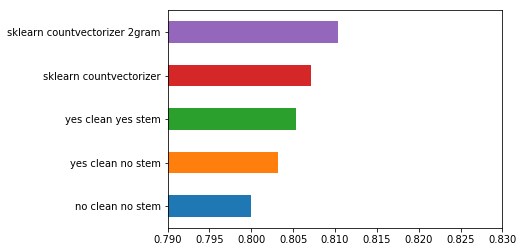

In [360]:
%matplotlib inline
df_results.T["test"].plot(kind="barh", xlim=(0.79,0.83))

## 2.3) Feature selection

### 2.3.1) SelectKbest 

In [361]:
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(1,2))
feature_selector = SelectKBest(chi2, k = 700000)
logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_5 = sklearn.pipeline.Pipeline([("count_vectorizer", count_vectorizer),
                                          ("feature_selector", feature_selector),
                                          ("logisticregression", logistic)],
                                         )# memory='/Users/Shared/sklearn_mem/')

In [362]:
%%time
model_pipe_5.fit(X_train, y_train)

CPU times: user 1min 14s, sys: 516 ms, total: 1min 15s
Wall time: 1min 15s


Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
 ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [363]:
acc_train = np.mean(model_pipe_5.predict(X_train) == y_train)
acc_test = np.mean(model_pipe_5.predict(X_test) == y_test)
df_results["sklearn countvectorizer 2gram + selection"] = [acc_train, acc_test]

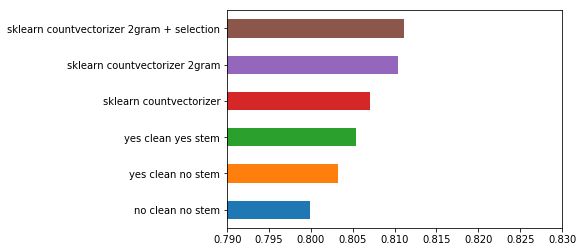

In [364]:
df_results.T["test"].plot(kind="barh", xlim=(0.79,0.83))

### 2.3.3) Feature Union

In [369]:
simple_count_vectorizer_stemmer = SimpleCountVectorizer(word_transformer_func= SnowballStemmer('english').stem,
                                                        doc_cleaner_pattern=re.compile("[^a-zA-Z]"))


count_vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(1,2))

In [370]:
union = sklearn.pipeline.FeatureUnion([("simple_count_vectorizer_stemmer", simple_count_vectorizer_stemmer),
                                       ("count_vectorizer", count_vectorizer)])

In [371]:
logistic = sklearn.linear_model.LogisticRegression(C=0.1)
feature_selector = SelectKBest(chi2, k = 700000)
model_pipe_6 = sklearn.pipeline.Pipeline([("union_vectorizers", union),
                                          ("feature_selector", feature_selector),
                                          ("logisticregression", logistic)],
                                         )# memory='/Users/Shared/sklearn_mem/')

In [372]:
%%time
model_pipe_6.fit(X_train, y_train)

CPU times: user 2min 53s, sys: 1.2 s, total: 2min 54s
Wall time: 2min 55s


Pipeline(memory=None,
     steps=[('union_vectorizers', FeatureUnion(n_jobs=1,
       transformer_list=[('simple_count_vectorizer_stemmer', SimpleCountVectorizer(doc_cleaner_func=None,
           doc_cleaner_pattern=re.compile('[^a-zA-Z]'),
           dtype=<class 'numpy.float32'>, min_word_counts=1,
           token_pattern=...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [373]:
acc_train = np.mean(model_pipe_6.predict(X_train) == y_train)
acc_test = np.mean(model_pipe_6.predict(X_test) == y_test)
df_results["Feature union + selection"] = [acc_train, acc_test]

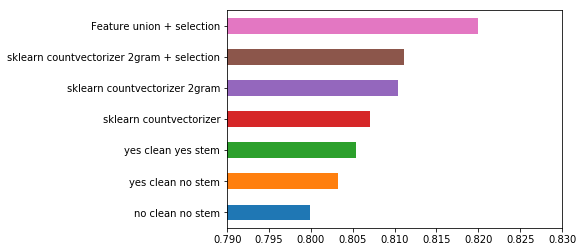

In [374]:
df_results.T["test"].plot(kind="barh", xlim=(0.79,0.83))

## 2.4) Crossvalidating results (Exercise)

It is very (VERY) important you do crossvalidation. 


If you have never use Bayesian Optimization for selecting hyperparameters I recommend you to try: https://scikit-optimize.github.io

In [ ]:
# Can't deepcopy objects with compiled regular expressions
# Therefore can't use GridSearch with our doc_cleaner with a compiled regular expression
# Minimal working example
#import re,copy
#class MyClass():
#    def __init__(self):
#        self.regex=re.compile('\d+')
#
#myobj = MyClass()    
#copy.deepcopy(myobj)

In [ ]:
#X_train_vec = union.fit_transform(X_train)
#n_features = X_train_vec.shape[1]
#min_k = n_features//2
#max_k = n_features

In [ ]:
simple_count_vectorizer_stemmer = SimpleCountVectorizer(lemmatizer= None,
                                                        stemmer= SnowballStemmer('english'),
                                                        doc_cleaner=r"[^a-zA-Z]")

count_vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(1,3))

union = sklearn.pipeline.FeatureUnion([("simple_count_vectorizer_stemmer", simple_count_vectorizer_stemmer),
                                       ("count_vectorizer", count_vectorizer)])

logistic = sklearn.linear_model.LogisticRegression(C=0.1)
feature_selector = SelectKBest(chi2)


# Hint
#model_pipe_6 = sklearn.pipeline.Pipeline([("union_vectorizers", union),
#                                          ("feature_selector", feature_selector),
#                                          ("logisticregression", logistic)],
#                                         )# memory='/Users/Shared/sklearn_mem/')

#possible_K = [int(x)-1 for x in np.linspace(min_k, max_k,10)]
#parameteres = {'feature_selector__k':possible_K, 'logisticregression__C':[0.1,0.01,0.001]}

#grid_6 = sklearn.model_selection.RandomizedSearchCV(model_pipe_6,
#                                                    param_distributions=parameteres, 
#                                                    cv=3,
#                                                    n_iter=2,
#                                                    n_jobs=1)


In [ ]:
#%time
#grid_6.fit(X_train, y_train)
# Returns error? Welcome to your custom sklearn pipelines
# Question: Why is there an error?
# ValueError: k should be >=0, <= n_features; got 3238254.Use k='all' to return all features.


In [ ]:
#acc_train = np.mean(grid_6.predict(X_train) == y_train)
#acc_test = np.mean(grid_6.predict(X_test) == y_test)
#print("acc_train={} acc_test={}".format(acc_train, acc_test))

In [ ]:
#df_results["Feature union + selection + CV"] = [acc_train, acc_test]
#df_results

## 2.5 Hashing words (Exercise)

Explore the results you get by hashing the input words. Add `df_results["Feature hash + selection + CV"]` in the table